In [13]:
import os
import csv
from PIL import Image
from tqdm import tqdm
from rembg import remove as remove_background


ASCII_CHARS = ["@", "#", "S", "%", "?", "*", "+", ";", ":", ",", "."]
ASCII_CHARS = [' ', '.', ',', ':', ';', '+', '*', '?', '%', 'S', '#', '@']

In [14]:
def resize_image(image, new_width=20):
    width, height = image.size
    ratio = height/width
    new_height = int(new_width * ratio)
    resized_image = image.resize((new_width, new_height)) # TODO copy
    return resized_image

def grayify(image):
    grayscale_image = image.convert("L")
    return grayscale_image

def pixels_to_ascii(image):
    pixels = image.getdata()
    duplicated_pixels = [pixel for pixel in pixels for _ in range(2)]
    characters = "".join([ASCII_CHARS[pixel//25] for pixel in duplicated_pixels])
    return characters

def sentencify(ascii_art_list: list, new_width):
    pixel_count = len(ascii_art_list) * 2
    ascii_image = "\n".join([ascii_art_list[index:(index+new_width)] for index in range(0, pixel_count, new_width)])
    return ascii_image

def csv_save(file_name, data):
    with open(file_name, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerows(data)

In [16]:
def main(data_path, csv_ascii_20_path, csv_asccii_100_path):
    ascii_20, ascii_100 = [], []
    for datasets_name in os.listdir(data_path):
        dataset_path = os.path.join(data_path, datasets_name)

        for class_ in os.listdir(dataset_path):
            class_path = os.path.join(dataset_path, class_)

            for sample in tqdm(os.listdir(class_path)):
                sample_path = os.path.join(class_path, sample)
                #print(f"Processing: Dataset {datasets_name}, Class {class_}, Sample {sample}")
                try:
                    image = Image.open(sample_path)
                    image = remove_background(image)
                except:
                    print(sample_path, " is not a valid pathname to an image.")
                    continue

                image_grey_20 = grayify(resize_image(image.copy(), 20))
                image_grey_100 = grayify(resize_image(image.copy(), 100))
                ascii_20.append([sentencify(pixels_to_ascii(image_grey_20), 40), class_, sample])
                ascii_100.append([sentencify(pixels_to_ascii(image_grey_100), 200), class_, sample])

    csv_save(csv_ascii_20_path, ascii_20)
    csv_save(csv_asccii_100_path, ascii_100)
    print('===> Done <===')

In [17]:
data_path = os.path.join(os.getcwd(), "data")
data_path

'/home/alex/Desktop/mistral_hackathon/src/image_to_ascii/data'

In [18]:
ascii_20_path = os.path.join(os.getcwd(), "ascii_20", "ascii_20.csv")
ascii_20_path

'/home/alex/Desktop/mistral_hackathon/src/image_to_ascii/ascii_20/ascii_20.csv'

In [19]:
ascii_100_path = os.path.join(os.getcwd(), "ascii_100", "ascii_100.csv")
ascii_100_path

'/home/alex/Desktop/mistral_hackathon/src/image_to_ascii/ascii_100/ascii_100.csv'

In [20]:
main(data_path, ascii_20_path, ascii_100_path)

  1%|          | 5/500 [00:04<06:39,  1.24it/s]

In [ ]:
import pandas as pd

df_ascii_20 = pd.read_csv(ascii_20_path, header=None, names=["ascii_art", "class", "sample_name"])
df_ascii_100 = pd.read_csv(ascii_100_path, header=None, names=["ascii_art", "class", "sample_name"])


In [11]:
img = Image.open('/home/alex/Desktop/mistral_hackathon/src/image_to_ascii/data/FirstDataset/Cat/1.png')

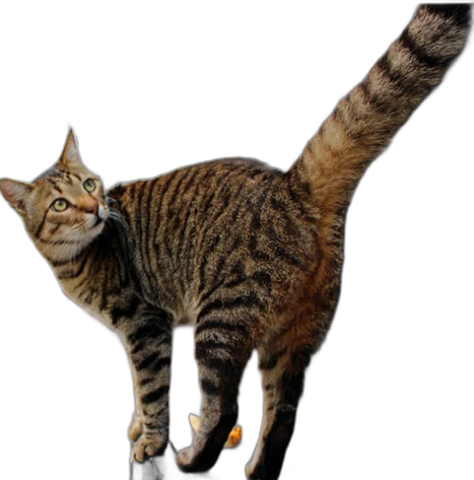

In [12]:
remove_background(img)